# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [4]:
#%tensorflow_version 1.x

In [5]:
import tensorflow as tf
print(tf.__version__)
#from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#tf.enable_eager_execution()

2.1.0


####Вспомогательный код

In [6]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11493376/11490434 [==============================] - 1s 0us/step


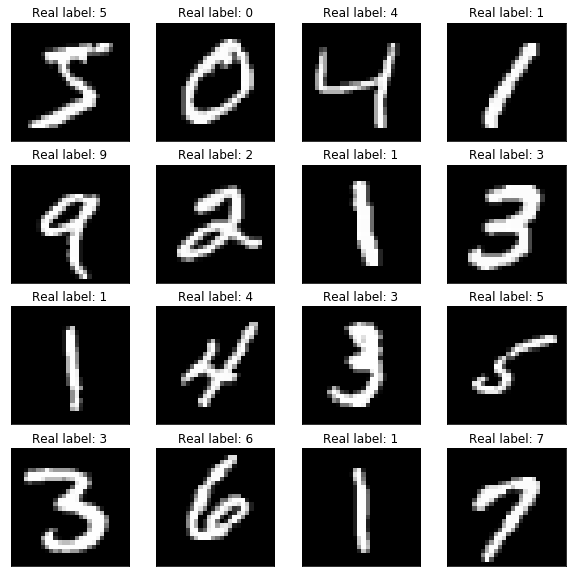

In [7]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))

#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

In [32]:
x_test.shape

(10000, 784)

In [5]:
# прикрепим ваш гугл диск к виртуальной машине
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

#path = Path("/content/drive/My Drive/Skillbox/model_1")
#path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
#assert path.exists()
#cpt_filename = "best_checkpoint.hdf5"  
#cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [11]:
# < YOUR CODE STARTS HERE >
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer= tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

#checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
          #callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
# < YOUR CODE ENDS HERE >

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3168 - accuracy: 0.9019 - val_loss: 0.1477 - val_accuracy: 0.9548
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1378 - accuracy: 0.9606 - val_loss: 0.1304 - val_accuracy: 0.9625
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1098 - accuracy: 0.9687 - val_loss: 0.1282 - val_accuracy: 0.9655
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0939 - accuracy: 0.9731 - val_loss: 0.1272 - val_accuracy: 0.9642
Epoch 5/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0863 - accuracy: 0.9763 - val_loss: 0.1234 - val_accuracy: 0.9664
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.1066 - val_accuracy: 0.9731
Epoch 7/20
60000/60000 [==============================] 

In [18]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

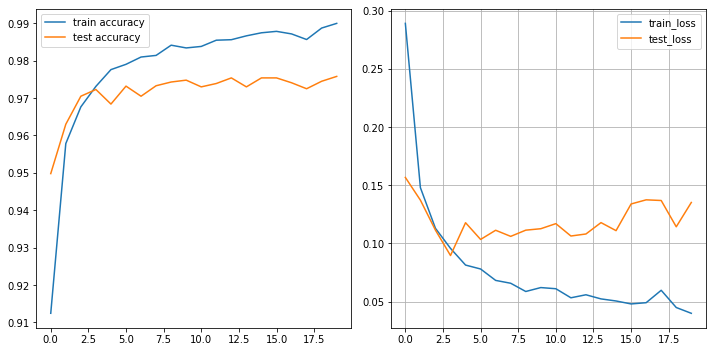

In [19]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [20]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10000/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

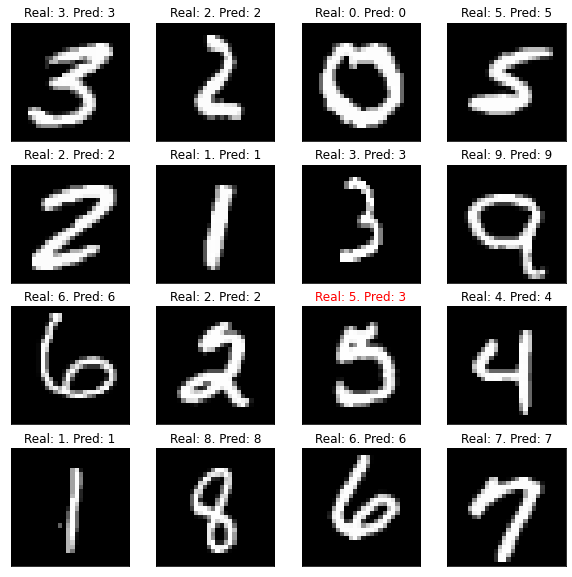

In [21]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])